# <div align = 'center'> <font color='red'> BOLUM 9
## <div align = 'center'> <font color='red'> ÖDEV
## <div align = 'center'> <font color='red'> KUMELEME ALGORITMALARININ PERFORMANSI NASIL OLCULUR
Bu ödevi tamamlamak için aşağıdaki sorulara çozümlerinizi içeren bir Jupyter defteri oluşturun:

1)İki küme k-ortalama çözümünün siluet katsayısını elde edin. Siluet katsayısının, küme sayısının üç olduğu yukarıdakilerden büyük olacağını göreceksiniz. Iris veri setinin üç farklı kümeden oluştuğunu biliyoruz. Kümelerin sayısının doğru sınıf sayısına eşit olmasıyla çözümün siluet puanının, küme sayısının doğru sınıf sayısından farklı olduğu seviyeden daha düşük olduğunu nasıl açıklarsınız?


2)Bu ödevde, UC Irvine Machine Learning Repository den elde edilecek kalp hastalığı verisi kullanılacaktır.

Veri seti kümeleme algoritmasına geçmeden önce bazı ön işlemlere ihtiyaç duymaktadır.

##### Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

##### Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

##### Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)
Burada, X sizin özellikleriniz olacak ve y içinde etiketleri tutuyoruz. Y, 1'e eşitse, o zaman buna karşılık gelen hastanın kalp hastalığı olduğunu ve y'nin 0'a eşit olması durumunda, hastanın kalp hastalığı olmadığı anlaşılacaktır.

Verileri rastgele ikiye bölün ve bu bölümdeki tutarlılık tartışmamızda yaptığımız gibi, küme sayısı olarak iki, üç ve dört kullanarak k-ortalama uygulayın. Görselleştirmeyi kullanarak çözümlerin tutarlılığını değerlendirin. Hangisi en iyisi gibi görünüyor?

K veri setini tüm veri kümelerine k, iki, üç ve dört eşit olacak şekilde uygulayın ve her biri için ARI puanı alın. Hangi model en iyisidir?
K veri setini tüm veri kümelerine k, iki, üç ve dört eşit olacak şekilde uygulayın ve her biri için siluet katsayısı elde edin. Hangi model en iyisidir?


In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

### Gerçek etiketlere sahip değilsek: benzerlik
Ya temel gerçekliğe sahip değilsek? O zaman, benzerlik gibi, kümeleri değerlendirmek için başka kriterler kullanmamız gerekir. İyi bir küme, diğer kümelerdeki veri noktalarına kıyasla birbirine benzer veri noktalarından oluşur. Benzerliği hesaplamanın bir yolu siluet (silhouette) katsayısıdır.

Her veri noktası için, siluet katsayısı, o veri noktası ile kümedeki diğer tüm noktalar arasındaki ortalama mesafe ve bu veri noktası ile en yakın diğer kümedeki ve o veri noktası ile en yakın küme içerisindeki diğer tüm veri noktalar arasındaki ortalama uzaklıktır. 

Tüm veri noktaları için siluet katsayılarının ortalaması, bu verilerdeki o kümelenme çözümü için siluet katsayısıdır. Değerler çok kötü kümelenmeler için -1 ile çok yoğun kümelenmeler için +1 arasındadır. Ancak, kümeler düz olmayan bir geometri kullanıyorsa, bu endeks iyi çalışmayacaktır.

Siluet katsayısı, farklı kümeleme algoritmalarının çözümlerini karşılaştırmak istediğiniz ve temel gerçeğe sahip olmadığınız durumlar için kullanışlıdır. Siluet katsayıları algoritmalar arasında karşılaştırılabilir, kümeleme çözümünü temsil etmek için tek sayılık bir indeks oluşturarak diğerleriyle karşılaştırılabilir.

In [6]:
# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [7]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [8]:
pca   = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [12]:
etiketler = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, etiketler, metric='euclidean'))

0.45994823920518635


In [9]:
etiketler = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, etiketler, metric='euclidean'))

0.5817500491982808


In [25]:
heart = pd.read_csv('data/heart.csv')

In [26]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


2) **a-Verileri rastgele ikiye bölün ve bu bölümdeki tutarlılık tartışmamızda yaptığımız gibi, küme sayısı olarak iki, üç ve dört kullanarak k-ortalama uygulayın. Görselleştirmeyi kullanarak çözümlerin tutarlılığını değerlendirin. Hangisi en iyisi gibi görünüyor?**

In [27]:
X = heart.drop('target', axis=1)
y = heart.target

In [28]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

C:\Users\ece-yusuf-sekoya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ece-yusuf-sekoya\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [32]:
k_ortalama2 = KMeans(n_clusters=2, random_state=40)

%timeit k_ortalama.fit(heart)
y_pred = k_ortalama.predict(heart)

19.5 ms ± 558 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_yarı1, X_yarı2, X_pcayarı1, X_pcayarı2 = train_test_split(X_std, X_pca, test_size=0.5, random_state=40)

In [34]:
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()

TypeError: unhashable type: 'slice'

In [35]:
# Data frame to store features and predicted cluster memberships.
ytahmin = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_yarı1, X_pcayarı1),
    (X_yarı2, X_pcayarı2)]):
    
    # Put the features into ypred.
    ytahmin['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ytahmin['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        tahmin = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ytahmin['clust' + str(nclust) + '_sample' + str(counter)] = tahmin

ValueError: Length of values does not match length of index

Gorsellestirme

KeyError: 'pca_f1_sample1'

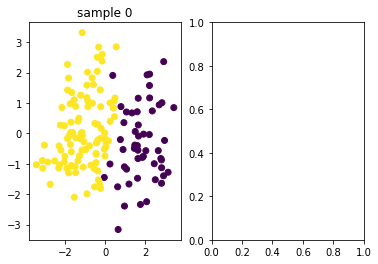

In [36]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ytahmin['pca_f1_sample{}'.format(i)]
        y_sub = ytahmin['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ytahmin['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

2) **b- K veri setini tüm veri kümelerine k, iki, üç ve dört eşit olacak şekilde uygulayın ve her biri için ARI puanı alın. Hangi model en iyisidir?**

In [37]:
# Tahmin edilen kümelemenin elde edilmesi.
tam_tahmin = KMeans(n_clusters=2, random_state=40).fit_predict(X_std)

pd.crosstab(y, tam_tahmin) 

col_0,0,1
target,,
0,93,45
1,12,153


In [38]:
tam_tahmin = np.array([0 if x == 1 else 1 if x==0 else 2 for x in tam_tahmin])

pd.crosstab(y, tam_tahmin) 

col_0,0,1
target,,
0,45,93
1,153,12


In [39]:
metrics.adjusted_rand_score(y, tam_tahmin)

0.3867962148223543

In [40]:
tam_tahmin = KMeans(n_clusters=3, random_state=40).fit_predict(X_std)
metrics.adjusted_rand_score(y, tam_tahmin)

0.2611134749265372

In [41]:
tam_tahmin = KMeans(n_clusters=4, random_state=40).fit_predict(X_std)
metrics.adjusted_rand_score(y, tam_tahmin)

0.16922705914260142

2) **c-K veri setini tüm veri kümelerine k, iki, üç ve dört eşit olacak şekilde uygulayın ve her biri için siluet katsayısı elde edin. Hangi model en iyisidir?**